# Introduction

This notebook contains answers to the [Fall 2021 Shopify Data Science Intern Challenge](https://docs.google.com/document/d/13VCtoyto9X1PZ74nPI4ZEDdb8hF8LAlcmLH1ZTHxKxE/edit#). A copy of this notebook can also be found on [Github](https://github.com/callRoko/shopify-data-science-challenge/blob/master/shopify_data_science_challenge.ipynb).

# Scenario

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

# Q1a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 




In [1]:
import pandas as pd
df = pd.read_excel('shopify_data_set_challenge.ods', engine='odf')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


We can see the dataframe and we have the order amount which is the revenue and the total items, so below I will check to see if the actual AOV and naive AOV match at all.

In [2]:
#understanding the five point statistics of the dataset
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking at the five point statistics above, we can see that the average order amount is \\$3145.13, which is the exact value of the naively calculated value above. However this value seems to be a bit high because we know that each sneaker shop is selling only one shoe model that is reasonably priced. There also seems to be a lot of variation in the order amount; as we can see above the values go from \\$90.00 to \\$704000.00. It would be best to see why that is happening by visualizing the data.

Text(0.5, 1.0, 'Order Amount Box Plot')

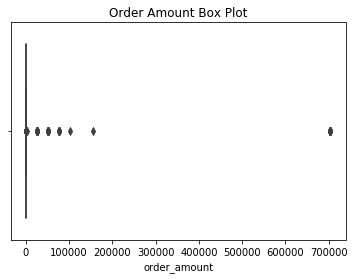

In [3]:
# checking out the dataset again to see if there are any large outliers
import seaborn as sns
sns.boxplot(x=df['order_amount']).set_title('Order Amount Box Plot')

As we can see from the box plot above, most of the data seems reasonable but then there are several outliers with the largest one being around \\$700000. Let's examine some of these outliers below.

In [4]:
# examing the outlier datapoints
df.loc[df['order_amount'] > 700000.00]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


Examining the largest outlier at \\$700000, we can see that all the orders are coming from the same store, with the same order amount and total items. All the orders also use the same type of payment method and some orders are repeated on the same date.

# Q1b) What metric would you report for this dataset?

Considering some of the issues highlighted above, I think it would be better to use the median order amount as the metric to report. The median is a better metric than the average because it is less sensitive to outliers like the ones we see above. I also considered the average order item value which is calculated in the appendix below.

# Q1c)  What is its value?

The median order amount is \\$284.00, which is significantly lower than the inital calculation of \\$3145.13. 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

# Q2a) How many orders were shipped by Speedy Express in total?

``` mysql 
SELECT COUNT(OrderID) as Total_Orders 
FROM Orders 
INNER JOIN Shippers ON Orders.ShipperID=Shippers.ShipperID
WHERE Shippers.ShipperName='Speedy Express';```

Total_Orders<br>
54

Speedy Express has a total of 54 orders.

# Q2b) What is the last name of the employee with the most orders?

```mysql
SELECT Employees.LastName, Employees.EmployeeID, COUNT(Orders.OrderID) AS Emp_orders
FROM Employees
LEFT JOIN Orders ON Employees.EmployeeID=Orders.EmployeeID
GROUP BY Employees.LastName, Employees.EmployeeID
ORDER BY COUNT(Orders.OrderID) DESC;```

LastName EmployeeID Emp_orders <br>
 Peacock    4             40 


The employee with the most orders is Peacock, who has 40 orders.

# Q2c) What product was ordered the most by customers in Germany?

```mysql
SELECT Products.ProductID, Products.ProductName, COUNT(Orders.OrderID)
FROM ((Products
INNER JOIN OrderDetails ON OrderDetails.ProductID=Products.ProductID)
INNER JOIN Orders ON Orders.OrderID=OrderDetails.OrderID)
INNER JOIN Customers ON Customers.CustomerID=Orders.CustomerID
WHERE Customers.Country='Germany'
GROUP BY Products.ProductID, Products.ProductName
ORDER BY COUNT(Orders.OrderID) DESC;```

ProductID  ProductName   Expr1002 <br>
31      Gorgonzola Telino   5 

The product that was ordered the most by customers in Germany is Gorgonzola Telino.

# Appendix: Average Order Item Value Calculation

In [5]:
#calculating the average amount per total items calculation
df['avg_item'] = df['order_amount']/df['total_items']

# looking at the five point  summary statistics again
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000
